#### download

In [1]:
import os

try:
    os.mkdir("images")
    os.mkdir("images/dogs")
    os.mkdir("images/cats")
except:
    pass

In [2]:
!wget https://i.kinja-img.com/gawker-media/image/upload/s--WFkXeene--/c_scale,f_auto,fl_progressive,q_80,w_800/ol9ceoqxidudap8owlwn.jpg -P images/dogs
!wget https://www.rspcansw.org.au/wp-content/uploads/2017/08/50_a-feature_dogs-and-puppies_mobile.jpg -P images/dogs

--2021-02-04 16:39:03--  https://i.kinja-img.com/gawker-media/image/upload/s--WFkXeene--/c_scale,f_auto,fl_progressive,q_80,w_800/ol9ceoqxidudap8owlwn.jpg
Resolving i.kinja-img.com (i.kinja-img.com)... 151.101.130.166, 151.101.194.166, 151.101.2.166, ...
접속 i.kinja-img.com (i.kinja-img.com)|151.101.130.166|:443... 접속됨.
HTTP request sent, awaiting response... 200 OK
Length: 32099 (31K) [image/jpeg]
Saving to: ‘images/dogs/ol9ceoqxidudap8owlwn.jpg.1’

ol9ceoqxidudap8owlw 100%[===================>]  31.35K  --.-KB/s    in 0.03s   

2021-02-04 16:39:04 (1.03 MB/s) - ‘images/dogs/ol9ceoqxidudap8owlwn.jpg.1’ saved [32099/32099]

--2021-02-04 16:39:04--  https://www.rspcansw.org.au/wp-content/uploads/2017/08/50_a-feature_dogs-and-puppies_mobile.jpg
Resolving www.rspcansw.org.au (www.rspcansw.org.au)... 101.0.86.38
접속 www.rspcansw.org.au (www.rspcansw.org.au)|101.0.86.38|:443... 접속됨.
HTTP request sent, awaiting response... 200 OK
Length: 130940 (128K) [image/jpeg]
Saving to: ‘images/dogs/50_a-

In [3]:
!wget https://www.catster.com/wp-content/uploads/2018/05/A-gray-cat-crying-looking-upset.jpg -P images/cats
!wget https://www.scarymommy.com/wp-content/uploads/2018/01/c1.jpg?w=700 -P images/cats

--2021-02-04 16:39:06--  https://www.catster.com/wp-content/uploads/2018/05/A-gray-cat-crying-looking-upset.jpg
Resolving www.catster.com (www.catster.com)... 192.124.249.102
접속 www.catster.com (www.catster.com)|192.124.249.102|:443... 접속됨.
HTTP request sent, awaiting response... 200 OK
Length: 165145 (161K) [image/jpeg]
Saving to: ‘images/cats/A-gray-cat-crying-looking-upset.jpg.1’

A-gray-cat-crying-l 100%[===================>] 161.27K   607KB/s    in 0.3s    

2021-02-04 16:39:07 (607 KB/s) - ‘images/cats/A-gray-cat-crying-looking-upset.jpg.1’ saved [165145/165145]

--2021-02-04 16:39:07--  https://www.scarymommy.com/wp-content/uploads/2018/01/c1.jpg?w=700
Resolving www.scarymommy.com (www.scarymommy.com)... 141.193.213.20, 141.193.213.21
접속 www.scarymommy.com (www.scarymommy.com)|141.193.213.20|:443... 접속됨.
HTTP request sent, awaiting response... 200 OK
Length: 2169547 (2.1M) [image/jpeg]
Saving to: ‘images/cats/c1.jpg?w=700.1’

c1.jpg?w=700.1      100%[===================>]   2.07

#### module

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torch.utils.data as data
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

In [5]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

#### hyper-parameters

In [6]:
batch_size = 1
learning_rate = 0.0002
num_epoch = 100

#### dataset

In [7]:
root_dir = "./images"

In [8]:
img_data = dset.ImageFolder(root_dir, transforms.Compose([
                                    transforms.Resize(256),
                                    transforms.RandomResizedCrop(224),
                                    transforms.RandomHorizontalFlip(),
                                    transforms.ToTensor(),
                            ]))

In [9]:
train_loader = data.DataLoader(img_data, batch_size=batch_size, shuffle=True, num_workers=2)

#### model

In [10]:
def conv_2_block(in_dim, out_dim):
    model = nn.Sequential(
            nn.Conv2d(in_dim, out_dim, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(out_dim, out_dim, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
            )
    return model

In [11]:
def conv_3_block(in_dim, out_dim):
    model = nn.Sequential(
            nn.Conv2d(in_dim, out_dim, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(out_dim, out_dim, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(out_dim, out_dim, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
            )
    return model

In [12]:
class VGG(nn.Module):
    def __init__(self, base_dim, num_classes=2):
        super(VGG, self).__init__()
        self.feature = nn.Sequential(
                        conv_2_block(3, base_dim),
                        conv_2_block(base_dim, 2*base_dim),
                        conv_3_block(2*base_dim, 4*base_dim),
                        conv_3_block(4*base_dim, 8*base_dim),
                        conv_3_block(8*base_dim, 8*base_dim),
                        )
        self.fc_layer = nn.Sequential(
                        nn.Linear(8*base_dim*7*7, 100),
                        nn.ReLU(True),
                        nn.Linear(100, 20),
                        nn.ReLU(True),
                        nn.Linear(20, num_classes),
                        )
    def forward(self, x, batch_size):
        x = self.feature(x)
        x = x.view(batch_size, -1)
        x = self.fc_layer(x)
        return x

In [13]:
model = VGG(base_dim=16).to(device)

In [14]:
model

VGG(
  (feature): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU()
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (1): Sequential(
      (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU()
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (2): Sequential(
      (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU()
      (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (5): ReLU()
      (6): MaxPool2d(kernel_size=2, stride=2, padding=0, di

#### loss

In [15]:
loss_func = nn.CrossEntropyLoss()

#### optimizer

In [16]:
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

#### train

In [17]:
loss_array = []
for i in range(num_epoch):
    for j, [image, label] in enumerate(train_loader):
        x = image.to(device)
        y_ = label.to(device)
        
        optimizer.zero_grad()
        output = model.forward(x, batch_size)
        loss = loss_func(output, y_)
        loss.backward()
        optimizer.step()
    
    if i%10 == 0:
        print(loss)
        loss_array.append(loss)

tensor(0.7944, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.6284, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(1.2276, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.4552, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(1.0647, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(1.1675, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(1.2328, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.3831, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.2076, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.5753, device='cuda:0', grad_fn=<NllLossBackward>)


#### plot

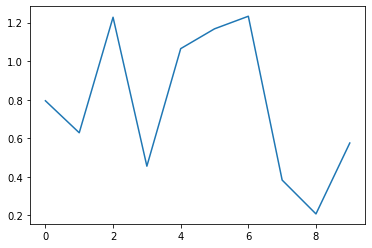

In [18]:
plt.plot(loss_array)
plt.show()